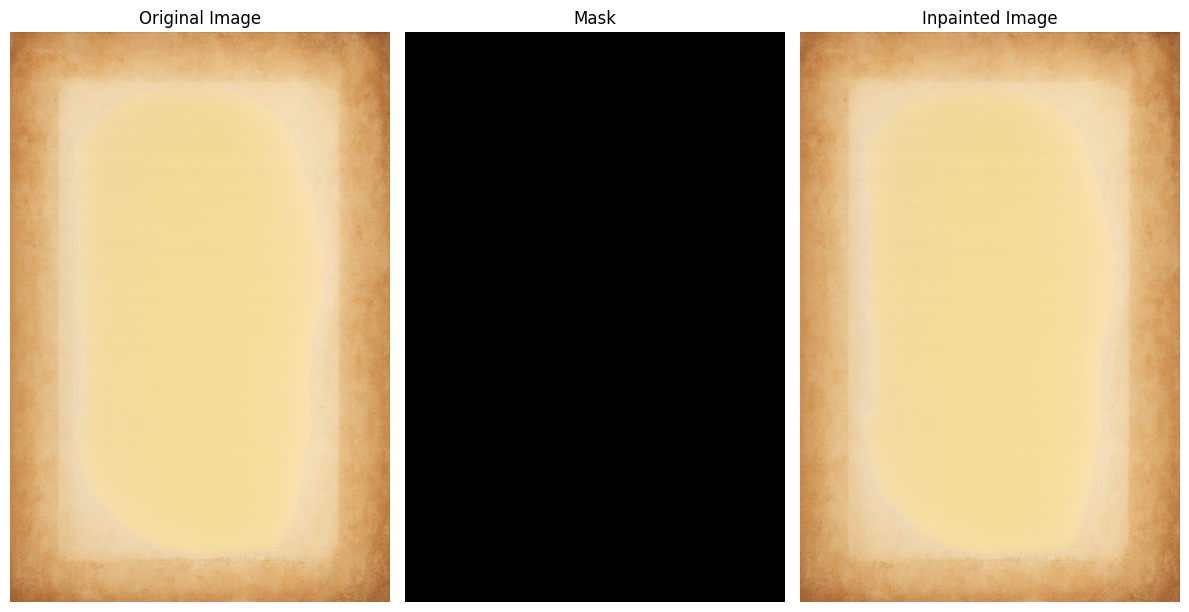

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('7.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a mask: detect the gray area
lower_bound = np.array([120, 120, 120])
upper_bound = np.array([135, 135, 135])
mask = cv2.inRange(image_rgb, lower_bound, upper_bound)

# Inpaint the image
inpainted_image = cv2.inpaint(image_rgb, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Plot original and inpainted image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(inpainted_image)
plt.title("Inpainted Image")
plt.axis("off")

plt.tight_layout()
plt.show()


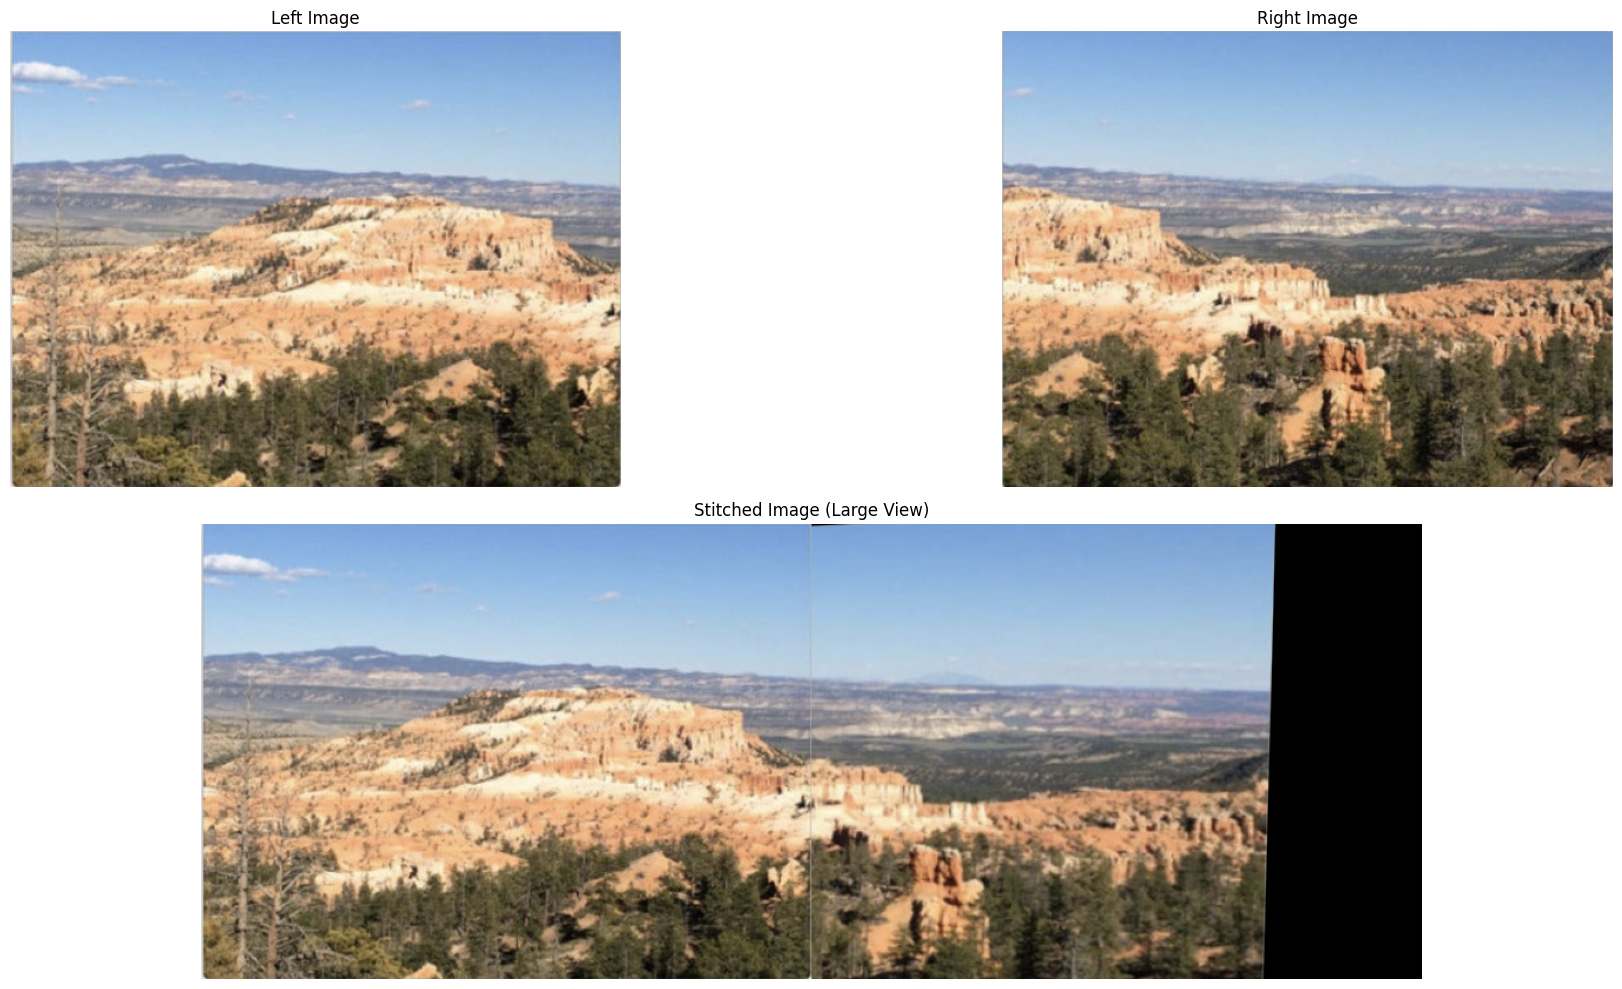

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stitch_images(img1_path, img2_path):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create(5000)
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    height, width, _ = img1.shape
    result = cv2.warpPerspective(img2, H, (width * 2, height))
    result[0:img1.shape[0], 0:img1.shape[1]] = img1

    return img1, img2, result

# Example usage
left_image_path = '1.png'
right_image_path = '2.png'
left_img, right_img, stitched_img = stitch_images(left_image_path, right_image_path)

# Display: stitched image is shown in a wider subplot
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB))
plt.title("Left Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB))
plt.title("Right Image")
plt.axis("off")

plt.subplot(2, 1, 2)  # This spans the full width
plt.imshow(cv2.cvtColor(stitched_img, cv2.COLOR_BGR2RGB))
plt.title("Stitched Image (Large View)")
plt.axis("off")

plt.tight_layout()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 126s 316ms/step - loss: 0.0249 - val_loss: 0.0090
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 311ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 306ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 310ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 306ms/step - loss: 0.0062 - val_loss: 0.0061
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 297ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 296ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 310ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 309ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 297ms/step - loss: 0.0053 - val_loss: 0.0052
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


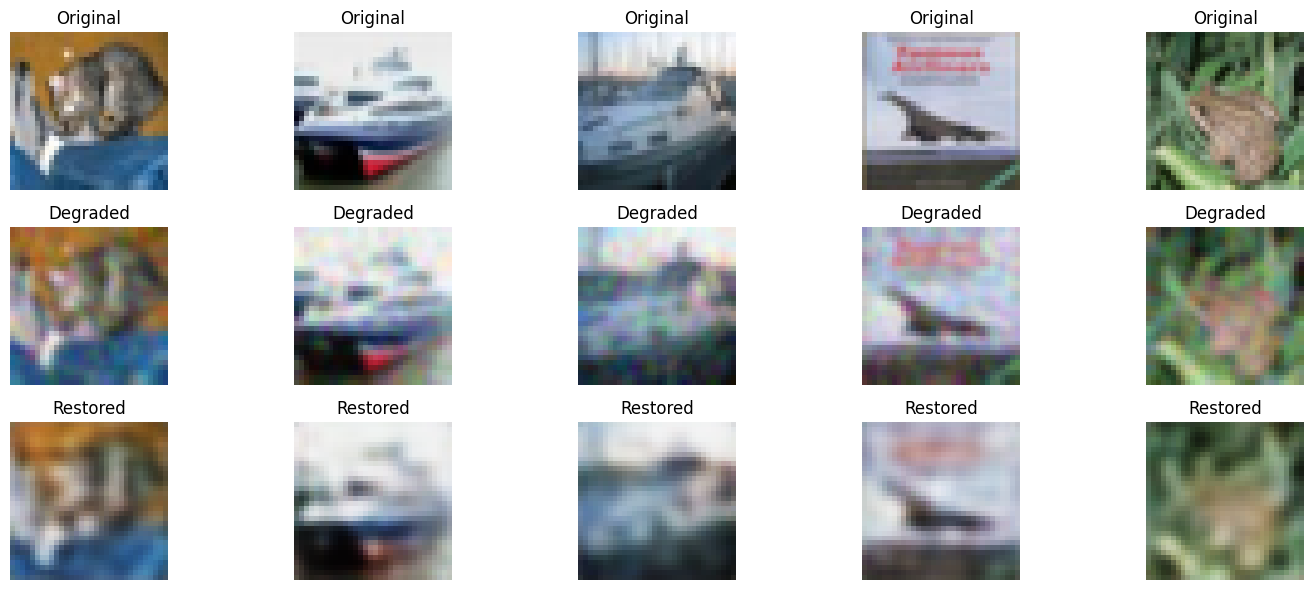

Average PSNR on 100 test samples: 23.2581575697474


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2

# -----------------------------
# Step 1: Load & Preprocess Data
# -----------------------------
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Resize (optional, keeping it at 32x32 here)
# Convert to grayscale (optional)
# x_train = tf.image.rgb_to_grayscale(x_train)
# x_test = tf.image.rgb_to_grayscale(x_test)

# -----------------------------
# Step 2: Simulate Degradation
# -----------------------------
def degrade_images(images):
    degraded = []
    for img in images:
        # Add Gaussian noise
        noisy = random_noise(img, mode='gaussian', var=0.01)
        # Add Gaussian blur
        blurred = cv2.GaussianBlur(noisy, (3, 3), 0)
        degraded.append(blurred)
    return np.clip(np.array(degraded), 0., 1.)

x_train_noisy = degrade_images(x_train)
x_test_noisy  = degrade_images(x_test)

# -----------------------------
# Step 3: Build the Autoencoder Model
# -----------------------------
def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 3))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# -----------------------------
# Step 4: Train the Model
# -----------------------------
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# -----------------------------
# Step 5: Image Restoration & Evaluation
# -----------------------------
predicted = autoencoder.predict(x_test_noisy)

# Show original, degraded, and restored images
n = 5
plt.figure(figsize=(15, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Degraded")
    plt.axis("off")

    # Restored
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predicted[i])
    plt.title("Restored")
    plt.axis("off")
plt.tight_layout()
plt.show()

# PSNR Evaluation
psnr_scores = [psnr(x_test[i], predicted[i]) for i in range(100)]
print("Average PSNR on 100 test samples:", np.mean(psnr_scores))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [ ]:
class Generator(nn.Module):
    def __init__(self, z_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(z_dim, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
0/50 | D Loss: 0.6900964379310608 | G Loss: 0.6813083291053772
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
10/50 | D Loss: 0.7179475426673889 | G Loss: 0.4476439654827118
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
20/50 | D Loss: 0.7489988803863525 | G Loss: 0.3818255

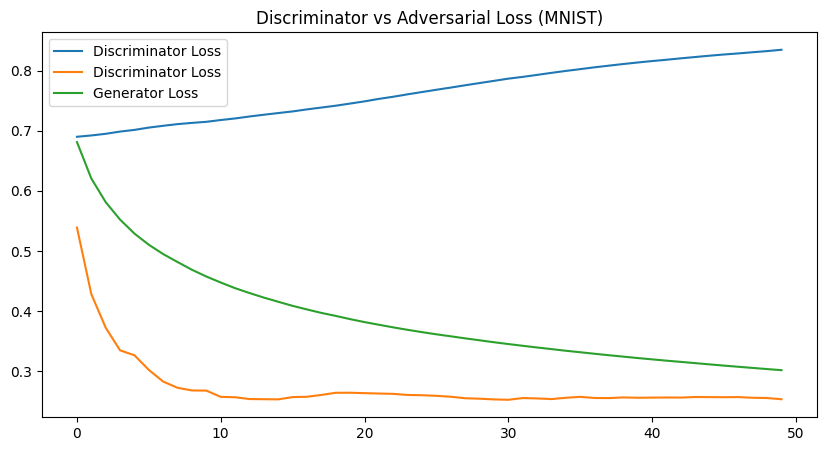

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_125" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 28, 28, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 28, 28, 3), dtype=float32, sparse=False, name=keras_tensor_693>',)
  • kwargs={'mask': 'None'}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
(X_train_mnist, _), (_, _) = tf.keras.datasets.mnist.load_data()
(X_train_cifar, _), (_, _) = tf.keras.datasets.cifar10.load_data()

# Normalize datasets
X_train_mnist = X_train_mnist / 127.5 - 1.0
X_train_cifar = X_train_cifar / 127.5 - 1.0

X_train_mnist = np.expand_dims(X_train_mnist, axis=-1)
X_train_cifar = X_train_cifar.astype(np.float32)

# Define the DCGAN model components
def build_generator(latent_dim, dataset_type='mnist'):
    model = tf.keras.Sequential()
    model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))  # Shape becomes (7, 7, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    if dataset_type == 'mnist':
        model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    elif dataset_type == 'cifar':
        model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model


def build_discriminator(img_shape):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# GAN Model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Training function
def train_gan(generator, discriminator, gan, X_train, epochs=50, batch_size=64):
    half_batch = batch_size // 2
    d_losses, g_losses = [], []

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_images = X_train[idx]
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        d_losses.append(d_loss)
        g_losses.append(g_loss)

        if epoch % 10 == 0:
            print(f"{epoch}/{epochs} | D Loss: {d_loss[0]} | G Loss: {g_loss}")

    return d_losses, g_losses

# Image generation function
def generate_images(generator, dataset_type='mnist', num_images=10):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)

    if dataset_type == 'mnist':
        generated_images = generated_images.reshape(num_images, 28, 28)
    elif dataset_type == 'cifar':
        generated_images = (generated_images + 1) / 2.0  # rescale to [0, 1]

    return generated_images

# Hyperparameters
latent_dim = 100
img_shape_mnist = (28, 28, 1)
img_shape_cifar = (32, 32, 3)

# Build models for MNIST
generator_mnist = build_generator(latent_dim, 'mnist')
discriminator_mnist = build_discriminator(img_shape_mnist)
gan_mnist = build_gan(generator_mnist, discriminator_mnist)

# Compile models
discriminator_mnist.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan_mnist.compile(loss='binary_crossentropy', optimizer='adam')

# Train GAN on MNIST dataset
d_losses_mnist, g_losses_mnist = train_gan(generator_mnist, discriminator_mnist, gan_mnist, X_train_mnist, epochs=50)

# Generate 10 digits for MNIST
mnist_images = generate_images(generator_mnist, 'mnist')

# Plot discriminator vs adversarial loss
plt.figure(figsize=(10, 5))
plt.plot(d_losses_mnist, label='Discriminator Loss')
plt.plot(g_losses_mnist, label='Generator Loss')
plt.legend()
plt.title("Discriminator vs Adversarial Loss (MNIST)")
plt.show()

# Repeat for CIFAR-10 with the necessary changes
# Build models for CIFAR-10
generator_cifar = build_generator(latent_dim, 'cifar')
discriminator_cifar = build_discriminator(img_shape_cifar)
gan_cifar = build_gan(generator_cifar, discriminator_cifar)

# Compile models
discriminator_cifar.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan_cifar.compile(loss='binary_crossentropy', optimizer='adam')

# Train GAN on CIFAR-10 dataset
d_losses_cifar, g_losses_cifar = train_gan(generator_cifar, discriminator_cifar, gan_cifar, X_train_cifar, epochs=50)

# Generate 10 images for CIFAR-10
cifar_images = generate_images(generator_cifar, 'cifar')

# Plot discriminator vs adversarial loss
plt.figure(figsize=(10, 5))
plt.plot(d_losses_cifar, label='Discriminator Loss')
plt.plot(g_losses_cifar, label='Generator Loss')
plt.legend()
plt.title("Discriminator vs Adversarial Loss (CIFAR-10)")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Epoch 0/50 | D Loss: 0.6694 | G Loss: 0.6659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


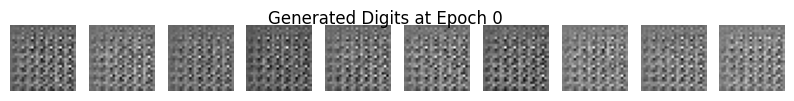

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Epoch 10/50 | D Loss: 0.7012 | G Loss: 0.4422
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


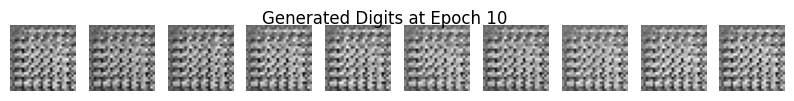

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Epoch 20/50 | D Loss: 0.7340 | G Loss: 0.3839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


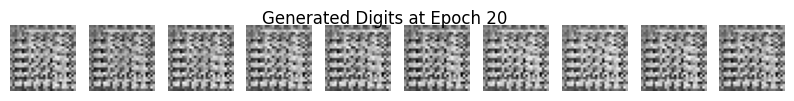

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Epoch 30/50 | D Loss: 0.7657 | G Loss: 0.3514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


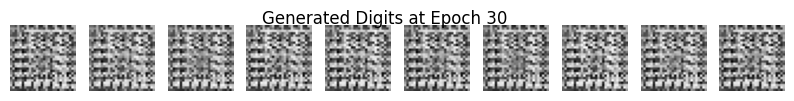

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Epoch 40/50 | D Loss: 0.7926 | G Loss: 0.3296
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


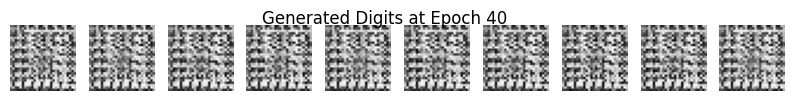

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


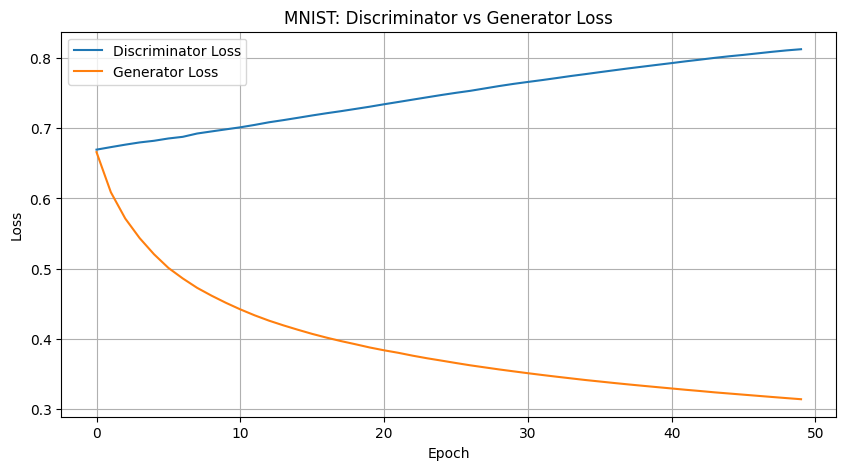

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST
(X_train_mnist, _), (_, _) = tf.keras.datasets.mnist.load_data()
X_train_mnist = (X_train_mnist / 127.5) - 1.0  # Normalize to [-1, 1]
X_train_mnist = np.expand_dims(X_train_mnist, axis=-1)  # (28, 28, 1)

# Generator for MNIST
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(latent_dim,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),

        layers.Conv2DTranspose(128, kernel_size=5, strides=1, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', use_bias=False, activation='tanh')
    ])
    return model

# Discriminator for MNIST
def build_discriminator(img_shape):
    model = tf.keras.Sequential([
        layers.Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=img_shape),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.Conv2D(128, kernel_size=3, strides=2, padding='same'),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# GAN model (stacked generator and discriminator)
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([generator, discriminator])
    return model

# Training function
def train_gan(generator, discriminator, gan, X_train, epochs=50, batch_size=64):
    half_batch = batch_size // 2
    d_losses, g_losses = [], []

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_imgs = X_train[idx]
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        d_losses.append(d_loss[0])
        g_losses.append(g_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss[0]:.4f} | G Loss: {g_loss:.4f}")
            generate_images(generator, epoch)

    return d_losses, g_losses

# Generate sample digits
def generate_images(generator, epoch=None, num_images=10):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_imgs = generator.predict(noise)
    generated_imgs = (generated_imgs + 1) / 2.0  # Scale to [0, 1]

    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, 10, i + 1)
        plt.imshow(generated_imgs[i, :, :, 0], cmap='gray')
        plt.axis('off')
    if epoch is not None:
        plt.suptitle(f"Generated Digits at Epoch {epoch}")
    plt.show()

# Hyperparameters and setup
latent_dim = 100
img_shape_mnist = (28, 28, 1)

generator_mnist = build_generator(latent_dim)
discriminator_mnist = build_discriminator(img_shape_mnist)
gan_mnist = build_gan(generator_mnist, discriminator_mnist)

discriminator_mnist.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan_mnist.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GAN
d_losses_mnist, g_losses_mnist = train_gan(generator_mnist, discriminator_mnist, gan_mnist, X_train_mnist, epochs=50)

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(d_losses_mnist, label='Discriminator Loss')
plt.plot(g_losses_mnist, label='Generator Loss')
plt.title("MNIST: Discriminator vs Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10 | Gen Loss: 4.3087, Disc Loss: 0.1608
Epoch 2/10 | Gen Loss: 3.5248, Disc Loss: 0.2536
Epoch 3/10 | Gen Loss: 2.7900, Disc Loss: 0.4729
Epoch 4/10 | Gen Loss: 1.8906, Disc Loss: 0.9955
Epoch 5/10 | Gen Loss: 1.6528, Disc Loss: 0.9417
Epoch 6/10 | Gen Loss: 1.2684, Disc Loss: 1.0717
Epoch 7/10 | Gen Loss: 1.0962, Disc Loss: 1.2069
Epoch 8/10 | Gen Loss: 1.0938, Disc Loss: 1.1506
Epoch 9/10 | Gen Loss: 1.3381, Disc Loss: 0.9371
Epoch 10/10 | Gen Loss: 1.1879, Disc Loss: 1.0384


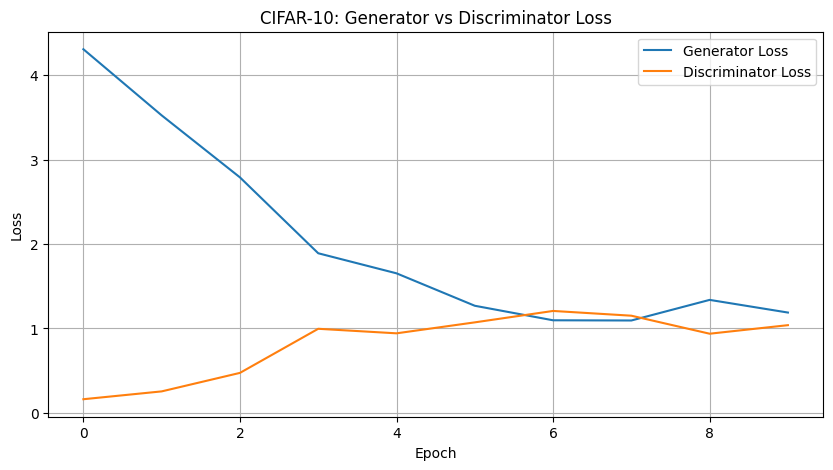

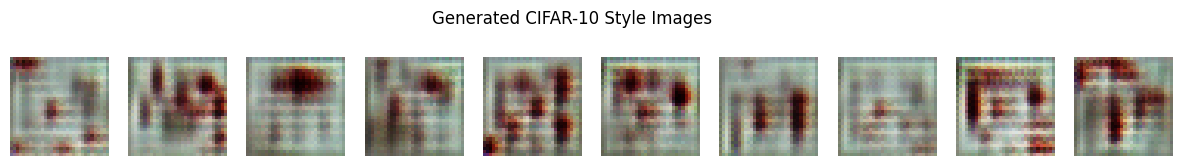

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10
(x_train, _), (_, _) = tf.keras.datasets.cifar10.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5  # Normalize to [-1, 1]
img_shape = (32, 32, 3)
latent_dim = 100

# Batch the data
batch_size = 128
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(10000).batch(batch_size)

# Build Generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(latent_dim,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((8, 8, 256)),

        layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')
    ])
    return model

# Build Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Input(shape=img_shape),
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Instantiate models
generator = build_generator()
discriminator = build_discriminator()

# Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()
gen_optimizer = tf.keras.optimizers.Adam(1e-4)
disc_optimizer = tf.keras.optimizers.Adam(1e-4)

# Track losses
gen_losses = []
disc_losses = []

# Training step
@tf.function
def train_step(real_images):
    noise = tf.random.normal([batch_size, latent_dim])
    with tf.GradientTape() as disc_tape, tf.GradientTape() as gen_tape:
        fake_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(fake_images, training=True)

        disc_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
        disc_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = disc_loss_real + disc_loss_fake

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)

    gradients_of_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    gen_optimizer.apply_gradients(zip(gradients_of_gen, generator.trainable_variables))
    disc_optimizer.apply_gradients(zip(gradients_of_disc, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Training loop
epochs = 10
for epoch in range(epochs):
    for batch in dataset:
        g_loss, d_loss = train_step(batch)
    gen_losses.append(g_loss.numpy())
    disc_losses.append(d_loss.numpy())
    print(f"Epoch {epoch+1}/{epochs} | Gen Loss: {g_loss:.4f}, Disc Loss: {d_loss:.4f}")

# Plot Generator vs Discriminator Loss
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CIFAR-10: Generator vs Discriminator Loss')
plt.legend()
plt.grid(True)
plt.show()

# Generate 10 CIFAR-style images
def show_generated_images(generator, num_images=10):
    noise = tf.random.normal([num_images, latent_dim])
    generated_images = generator(noise, training=False)
    generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]

    plt.figure(figsize=(15, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.suptitle("Generated CIFAR-10 Style Images")
    plt.show()

# Show images
show_generated_images(generator)


In [ ]:
# MobileNet V1, V2, V3 Comparison for Dog Breed Classification

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

# Device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset path
data_dir = '/root/.cache/kagglehub/datasets/gauravduttakiit/dogs-breed-dataset/versions/1'

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Common Training Loop
def train_model(model, criterion, optimizer, num_epochs=5):
    model.to(device)
    history = {"train_loss": [], "val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        history["train_loss"].append(epoch_loss)

        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        history["val_acc"].append(acc)
        print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f} Val Accuracy: {acc:.4f}")

    return history

# Load and Modify Models
num_classes = len(dataset.classes)

def load_mobilenet(version="v2"):
    if version == "v1":
        import timm
        # Changed model name to 'mobilenetv1_100'
        model = timm.create_model('mobilenetv1_100', pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    # ... (rest of the function remains the same)
    elif version == "v2":
        model = models.mobilenet_v2(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif version == "v3":
        model = models.mobilenet_v3_large(pretrained=True)
        model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)
    else:
        raise ValueError("Unsupported version")

    for param in model.parameters():
        param.requires_grad = False
    for param in model.classifier.parameters():
        param.requires_grad = True

    return model

# Train and evaluate all versions
histories = {}
for version in ["v1", "v2", "v3"]:
    print(f"\nTraining MobileNet-{version.upper()}")
    model = load_mobilenet(version)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
    start_time = time.time()
    history = train_model(model, criterion, optimizer, num_epochs=5)
    end_time = time.time()
    print(f"Training time for MobileNet-{version.upper()}: {end_time - start_time:.2f}s")
    histories[version] = history

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
for version in histories:
    plt.plot(histories[version]['val_acc'], label=f'MobileNet-{version.upper()}')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/gauravduttakiit/dogs-breed-dataset/versions/1'

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/dogs-breed-dataset")

print("Path to dataset files:", path)

100%|██████████| 630M/630M [00:06<00:00, 101MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gauravduttakiit/dogs-breed-dataset/versions/1



Training MobileNet-V1


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [1/5] Loss: 0.5480 Val Accuracy: 0.7718


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [2/5] Loss: 0.4937 Val Accuracy: 0.7718


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [3/5] Loss: 0.4683 Val Accuracy: 0.7718


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [4/5] Loss: 0.4491 Val Accuracy: 0.7718


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [5/5] Loss: 0.4465 Val Accuracy: 0.7670
Training time for MobileNet-V1: 606.54s

Training MobileNet-V2


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 93.3MB/s]
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(

Epoch [1/5] Loss: 0.5381 Val Accuracy: 0.7718


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [2/5] Loss: 0.4824 Val Accuracy: 0.7670


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [3/5] Loss: 0.4692 Val Accuracy: 0.7670


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [4/5] Loss: 0.4612 Val Accuracy: 0.7670


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [5/5] Loss: 0.4508 Val Accuracy: 0.7718
Training time for MobileNet-V2: 643.72s

Training MobileNet-V3


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 90.4MB/s]
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA

Epoch [1/5] Loss: 0.5950 Val Accuracy: 0.7427


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [2/5] Loss: 0.4333 Val Accuracy: 0.7718


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch [3/5] Loss: 0.3595 Val Accuracy: 0.7282


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [4/5] Loss: 0.2973 Val Accuracy: 0.6893


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [5/5] Loss: 0.2153 Val Accuracy: 0.6845
Training time for MobileNet-V3: 457.23s


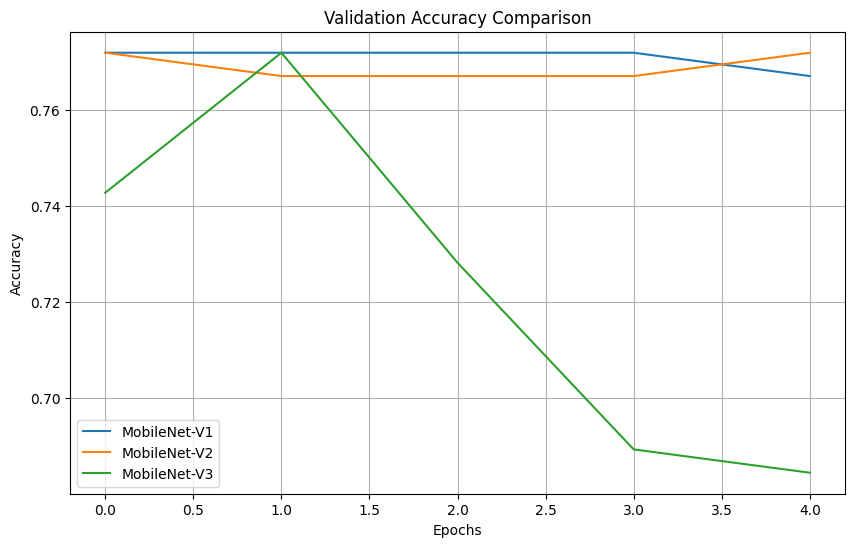

In [ ]:
# MobileNet V1, V2, V3 Comparison for Dog Breed Classification

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

# Device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset path
data_dir = '/root/.cache/kagglehub/datasets/gauravduttakiit/dogs-breed-dataset/versions/1'

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Common Training Loop
def train_model(model, criterion, optimizer, num_epochs=5):
    model.to(device)
    history = {"train_loss": [], "val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        history["train_loss"].append(epoch_loss)

        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        history["val_acc"].append(acc)
        print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f} Val Accuracy: {acc:.4f}")

    return history

# Load and Modify Models
num_classes = len(dataset.classes)

def load_mobilenet(version="v2"):
    if version == "v1":
        import timm
        # Changed model name to 'mobilenetv1_100'
        model = timm.create_model('mobilenetv1_100', pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    # ... (rest of the function remains the same)
    elif version == "v2":
        model = models.mobilenet_v2(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif version == "v3":
        model = models.mobilenet_v3_large(pretrained=True)
        model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)
    else:
        raise ValueError("Unsupported version")

    for param in model.parameters():
        param.requires_grad = False
    for param in model.classifier.parameters():
        param.requires_grad = True

    return model

# Train and evaluate all versions
histories = {}
for version in ["v1", "v2", "v3"]:
    print(f"\nTraining MobileNet-{version.upper()}")
    model = load_mobilenet(version)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
    start_time = time.time()
    history = train_model(model, criterion, optimizer, num_epochs=5)
    end_time = time.time()
    print(f"Training time for MobileNet-{version.upper()}: {end_time - start_time:.2f}s")
    histories[version] = history

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
for version in histories:
    plt.plot(histories[version]['val_acc'], label=f'MobileNet-{version.upper()}')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()